- **File**: Titanic_EDA.ipynb
- **Author**: Jupyter MCP Server
- **Created Time**: 2025-09-17
- **Description**: 本Notebook用于交互式数据探索,完成第一步数据加载与理解

# 数据加载与理解

In [1]:
# 加载数据并查看前5行示例数据
import pandas as pd
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


> 数据字典

| **变量** | **定义** | **值** |
| :--- | :--- | :--- |
| survival | 存活情况 | 0 = 否, 1 = 是 |
| pclass | 船票等级 | 1 = 一等, 2 = 二等, 3 = 三等 |
| sex | 性别 | |
| Age | 年龄（岁） | |
| sibsp | 在泰坦尼克号上的兄弟姐妹/配偶数量 | |
| parch | 在泰坦尼克号上的父母/孩子数量 | |
| ticket | 船票号码 | |
| fare | 乘客票价 | |
| cabin | 船舱号 | |
| embarked | 登船港口 | C = 瑟堡, Q = 皇后镇, S = 南安普敦 |

In [2]:
# 查看数据类型与缺失值数量
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# 查看数值型数据基本统计信息
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> 初步发现

1. **数据概览**: 训练集包含891条乘客数据,共12个字段
2. **缺失值**: `Age`字段有`891-714=177`个缺失值,`Cabin`字段有`891-204=687`个缺失值,缺失较为严重,`Embarked`字段有2个缺失值
3. **数据类型**: `PassengerId`, `Survived`, `Pclass`, `SibSp`, `Parch`为整数,`Age`, `Fare`为浮点数,其余为字符串类型,符合预期
4. **数值特征**: 
    - `Survived`: 约38%的乘客幸存,样本不均衡问题不严重
    - `Pclass`: 乘客以三等舱居多
    - `Age`: 乘客平均年龄约30岁,年龄数据缺失较多,需要后续处理
    - `Fare`: 票价差异巨大,可能存在异常值

# 数据探索性分析(EDA)

In [4]:
# 设置可视化样式
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif':['SimSun', 'Times New Roman'] ,
    'axes.unicode_minus':False
})

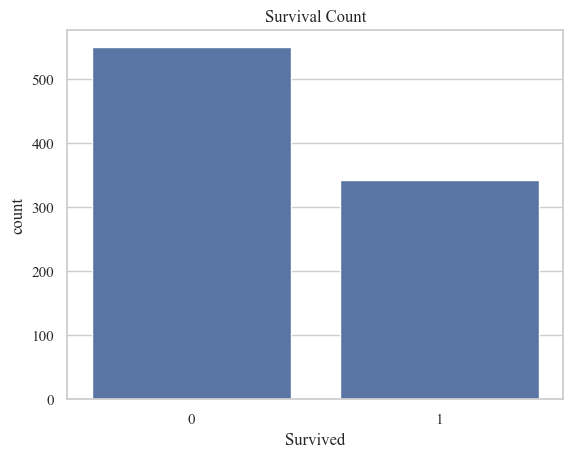

In [5]:
# 查看生还者与遇难者数量
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

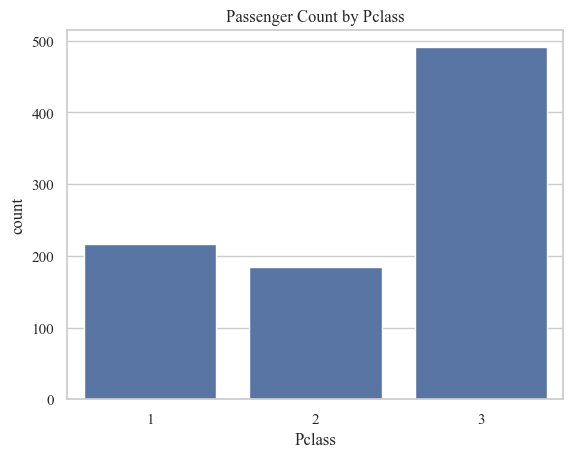

In [6]:
# 查看不同船票等级的乘客数量
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Count by Pclass')
plt.show()

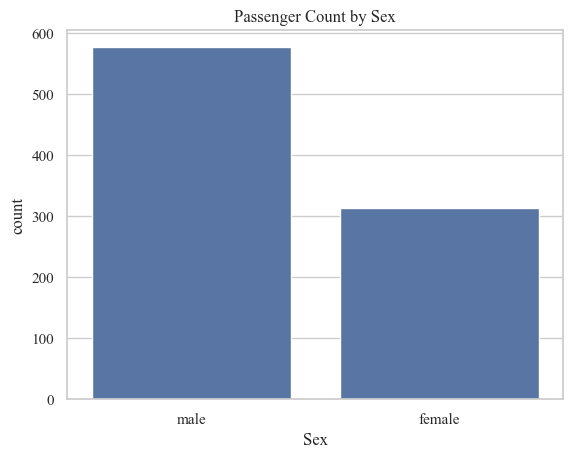

In [7]:
# 查看不同性别的乘客数量
sns.countplot(x='Sex', data=df)
plt.title('Passenger Count by Sex')
plt.show()

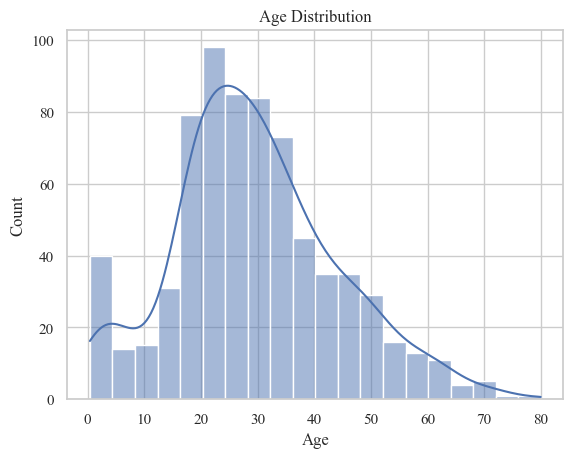

In [8]:
# 查看乘客年龄分布
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

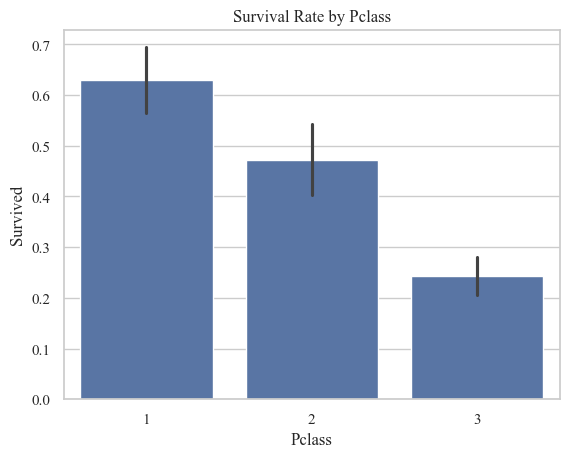

In [9]:
# 查看不同船票等级的生还率
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.show()

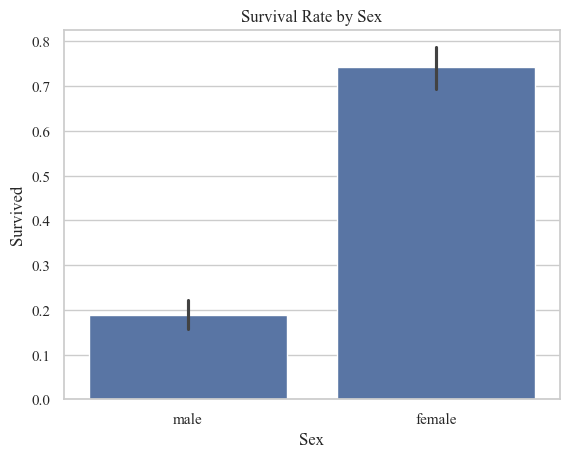

In [10]:
# 查看不同性别的生还率
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

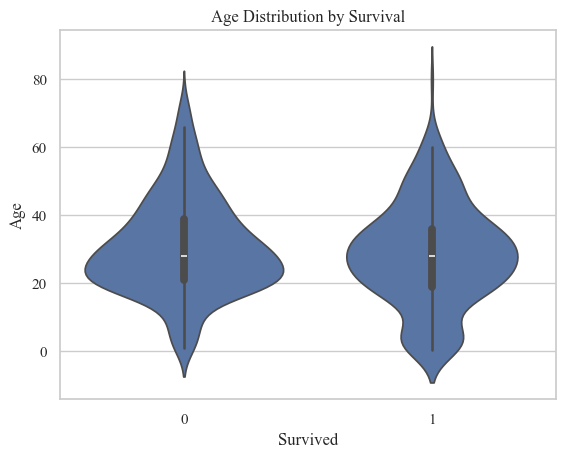

In [11]:
# 查看不同年龄的生还情况
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

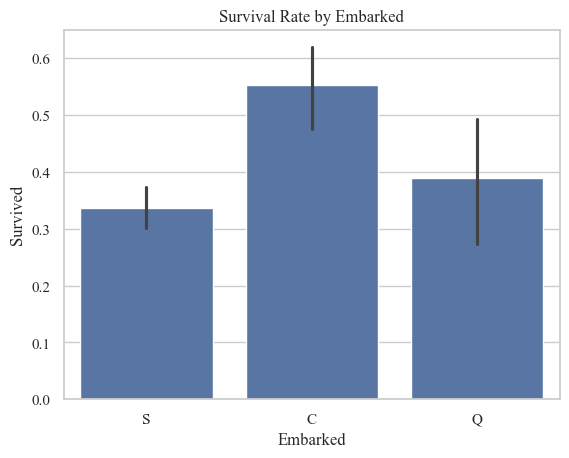

In [12]:
# 查看不同登船港口的生还率
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarked')
plt.show()

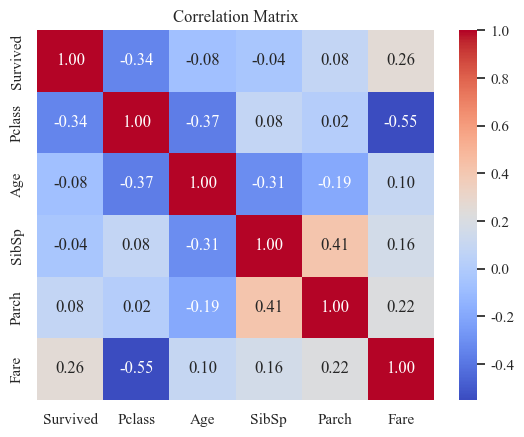

In [13]:
# 查看数值型特征之间的相关性
corr = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

> EDA关键发现

1.  **`Pclass`与`Survived`**: 船票等级越高,生还率越高,一等舱的生还率远高于二等舱和三等舱,说明社会经济地位是影响生还的重要因素
2.  **`Sex`与`Survived`**: 女性的生还率远高于男性,这符合"妇女和儿童优先"的原则
3.  **`Age`与`Survived`**: 儿童的生还率相对较高,而青壮年(15-35岁)的生还率较低,老年人的生还率也较低
4.  **`Embarked`与`Survived`**: 从瑟堡(C)登船的乘客生还率最高,这可能与该港口登船的乘客社会经济地位较高有关
5.  **特征相关性**: `Fare`和`Pclass`有较强的负相关性,说明票价越高,船票等级越高,这符合常识.`Survived`与`Pclass`和`Fare`有较明显的相关性,再次印证了社会经济地位对生还率的影响

# 数据预处理与清洗

In [14]:
# 处理Age缺失值
# 使用Pclass和Sex分组后的年龄中位数填充
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
# 处理Embarked缺失值
# 使用众数填充
most_frequent_port = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_port, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/var/folders/r3/rh624_896zs5b4g5z03dqny80000gp/T/ipykernel_16607/3513015102.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(most_frequent_port, inplace=True)


In [16]:
# 处理Cabin缺失值
# 使用U填充,表示未知
df['Cabin'].fillna('U', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/var/folders/r3/rh624_896zs5b4g5z03dqny80000gp/T/ipykernel_16607/1619618678.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('U', inplace=True)


In [17]:
# 将Sex特征转换为数值类型
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,S


In [18]:
# 将Embarked特征进行One-Hot编码
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,S,False,False,True


In [19]:
# 删除不需要的特征
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True


> 数据清洗与预处理总结

1.  **处理缺失值**:
    *   **`Age`**: 针对`Age`的缺失值,考虑到年龄与社会地位(`Pclass`)和性别(`Sex`)可能存在关联,我们采用`Pclass`和`Sex`分组后的年龄中位数进行填充,这比使用全局中位数或均值更为合理
    *   **`Embarked`**: 对于`Embarked`的两个缺失值,我们采用众数进行填充,因为缺失数量很少,这种方法简单有效
    *   **`Cabin`**: `Cabin`字段缺失严重,我们首先将其所有缺失值填充为`U`(Unknown),将其视为一个独立的类别,方便后续的特征工程

2.  **特征转换**:
    *   **`Sex`**: 将`Sex`字段从文本(`male`/`female`)映射为数值(`0`/`1`),以便模型能够处理
    *   **`Embarked`**: 将`Embarked`字段转换为One-Hot编码,生成`Embarked_C`, `Embarked_Q`, `Embarked_S`三个新的二进制特征,以消除类别间的序数关系

3.  **特征删除**:
    *   删除了`PassengerId`, `Name`, `Ticket`等对于预测生还率无直接作用的唯一标识符或文本特征
    *   删除了原始的`Cabin`和`Embarked`特征,因为它们已被新的特征所替代

# 特征工程

In [20]:
# 创建FamilySize和IsAlone特征
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,0,22.0,7.2500,False,False,True,2,0
1,1,1,1,38.0,71.2833,True,False,False,2,0
2,1,3,1,26.0,7.9250,False,False,True,1,1
3,1,1,1,35.0,53.1000,False,False,True,2,0
4,0,3,0,35.0,8.0500,False,False,True,1,1


In [24]:
# 重新进行数据预处理和特征工程
import pandas as pd
df = pd.read_csv('data/train.csv')

# 提取Title特征
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 缺失值处理
df['Age'] = df.groupby(['Title','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Cabin'].fillna('U', inplace=True)

# 特征转换
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)

# 特征工程
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
df['Deck'] = df['Cabin'].map(lambda x: x[0])

# Title处理
rare_titles = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
title_dummies = pd.get_dummies(df['Title'], prefix='Title')
df = pd.concat([df, title_dummies], axis=1)


# 删除不需要的列
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'SibSp', 'Parch', 'Title'], axis=1, inplace=True)

# 将Deck特征转换为数值
deck_dummies = pd.get_dummies(df['Deck'], prefix='Deck')
df = pd.concat([df, deck_dummies], axis=1)
df.drop('Deck', axis=1, inplace=True)

# 将Age和Fare进行分箱
df['AgeBin'] = pd.qcut(df['Age'], 5, labels=False, duplicates='drop')
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=False, duplicates='drop')
df.drop(['Age', 'Fare'], axis=1, inplace=True)

df.head()

<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
/var/folders/r3/rh624_896zs5b4g5z03dqny80000gp/T/ipykernel_16607/2199127204.py:6: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
/var/folders/r3/rh624_896zs5b4g5z03dqny80000gp/T/ipykernel_16607/2199127204.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
/var/folders/r3/rh624_896zs5b4g5z03dqny80000

,Survived,Pclass,Sex,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,Title_Master,Title_Miss,...,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,AgeBin,FareBin
0,0,3,0,False,False,True,2,0,False,False,...,False,False,False,False,False,False,False,True,1,0
1,1,1,1,True,False,False,2,0,False,False,...,False,True,False,False,False,False,False,False,3,3
2,1,3,1,False,False,True,1,1,False,True,...,False,False,False,False,False,False,False,True,1,1
3,1,1,1,False,False,True,2,0,False,False,...,False,True,False,False,False,False,False,False,3,3
4,0,3,0,False,False,True,1,1,False,False,...,False,False,False,False,False,False,False,True,3,1


> 特征工程总结

1.  **`Title`**: 
    *   从`Name`特征中提取了乘客的头衔(如`Mr`, `Mrs`, `Miss`等),并创建了`Title`特征
    *   将稀有的头衔统一归为`Rare`类别,并将一些相近的头衔(如`Mlle`, `Ms`归为`Miss`)进行合并
    *   对`Title`特征进行了One-Hot编码,这能更精确地反映乘客的社会身份,并对`Age`的缺失值填充提供了更精细的依据

2.  **`FamilySize`与`IsAlone`**: 
    *   我们将`SibSp`和`Parch`合并为`FamilySize`(`FamilySize` = `SibSp` + `Parch` + 1),以捕捉家庭总人数对生还率的影响
    *   基于`FamilySize`,我们创建了`IsAlone`特征,用于标识乘客是否独自一人,这在EDA中发现可能与生还率有关

3.  **`Deck`**: 
    *   从`Cabin`特征中提取首字母创建了`Deck`特征,代表乘客所在的甲板区域
    *   由于`Cabin`的大量缺失值已被标记为`U`,因此`Deck`特征中`U`也成为了一个独立的类别,这本身可能就是一个强信号(缺失`Cabin`信息可能意味着乘客住在更便宜的区域)
    *   最后对`Deck`特征进行了One-Hot编码

4.  **`AgeBin`与`FareBin`**: 
    *   我们将连续的`Age`和`Fare`特征进行了分箱处理,创建了`AgeBin`和`FareBin`
    *   分箱操作可以将非线性的关系转化为线性关系,同时减少异常值的影响,使模型更加稳健

# 机器学习建模

> 逻辑回归 (Logistic Regression)是一种广义的线性回归分析模型,常用于数据挖掘,疾病自动诊断,经济预测等领域,其主要思想是:根据现有数据对分类边界线建立回归公式,以此进行分类

逻辑回归的数学原理可以简述为以下几个步骤:

1.  **Sigmoid函数**: 逻辑回归的核心是Sigmoid函数,它的输出值在0和1之间,函数表达式为: $$ g(z) = \frac{1}{1 + e^{-z}} $$  这个函数能将任意实数输入映射到(0, 1)区间,正好对应了概率的取值范围

2.  **预测函数**: 对于给定的输入特征$x$,我们希望有一个函数能输出预测结果,逻辑回归的预测函数就是将线性回归的输出作为Sigmoid函数的输入,即: $$ h_\theta(x) = g(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}} $$  其中$\theta$是模型的参数,$\theta^T x$是线性组合

3.  **代价函数**: 为了训练模型,我们需要一个代价函数来衡量模型预测的好坏,逻辑回归的代价函数通常使用对数损失函数(Log Loss),其表达式为: $$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))] $$  其中$m$是样本数量,$y^{(i)}$是第$i$个样本的真实标签

4.  **梯度下降**: 为了最小化代价函数$J(\theta)$,我们使用梯度下降算法来更新参数$\theta$,每次迭代更新的公式为: $$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) $$  其中$\alpha$是学习率

通过以上步骤,逻辑回归模型可以学习到一组最优的参数$\theta$,使得模型能够对新的输入数据进行准确的分类

In [25]:
# 划分数据集并训练逻辑回归模型
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 划分特征和标签
X = df.drop('Survived', axis=1)
y = df['Survived']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练逻辑回归模型
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# 评估模型
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}\n')
print(f'Confusion Matrix:\n{conf_matrix}\n')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8156424581005587

Confusion Matrix:
[[88 17]
 [16 58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       105
           1       0.77      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



> 模型性能评估

我们使用逻辑回归模型进行了建模,并在20%的测试集上进行了评估,结果如下:

1.  **准确率 (Accuracy)**: 模型在测试集上的准确率为**81.6%**,说明模型能够正确预测大部分乘客的生还情况

2.  **混淆矩阵 (Confusion Matrix)**:
    *   **真阴性 (True Negative)**: 88 (正确预测为遇难)
    *   **假阳性 (False Positive)**: 17 (错误预测为生还)
    *   **假阴性 (False Negative)**: 16 (错误预测为遇难)
    *   **真阳性 (True Positive)**: 58 (正确预测为生还)

3.  **分类报告 (Classification Report)**:
    *   对于类别`0`(遇难),模型的**精确率(Precision)**为85%,**召回率(Recall)**为84%
    *   对于类别`1`(生还),模型的**精确率(Precision)**为77%,**召回率(Recall)**为78%

综合来看,逻辑回归模型在泰坦尼克号生还预测任务上表现良好,具有不错的泛化能力,后续可以通过交叉验证、超参数调优等方式进一步提升模型性能

# 模型可解释性

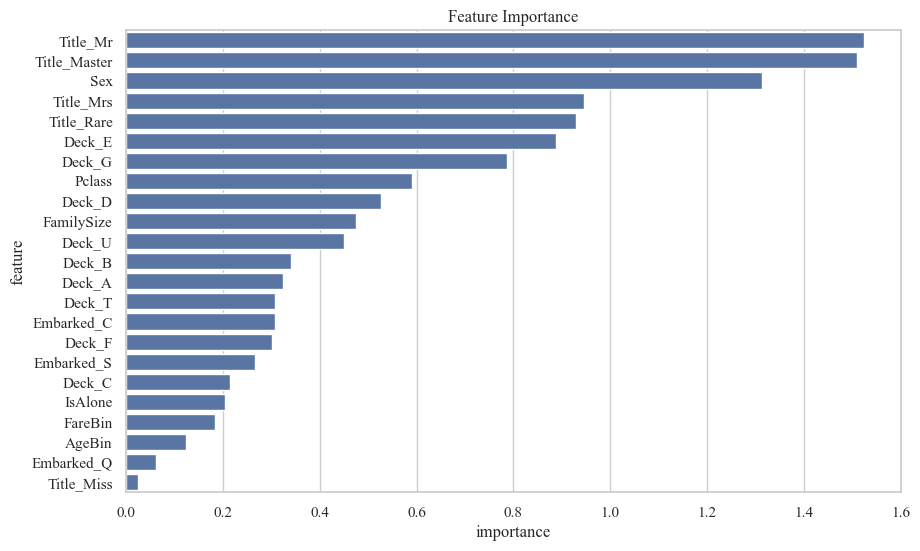

In [27]:
# 获取特征重要性并可视化
import numpy as np
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': np.abs(logreg.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

# 预测测试集并生成提交文件

In [31]:
# 加载并处理测试数据
df_test = pd.read_csv('data/test.csv')

# 保存PassengerId用于提交
passenger_ids = df_test['PassengerId']

# 提取Title特征
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 缺失值处理
df_test['Age'] = df_test.groupby(['Title','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)
df_test['Cabin'].fillna('U', inplace=True)

# 特征转换
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
embarked_dummies = pd.get_dummies(df_test['Embarked'], prefix='Embarked')
df_test = pd.concat([df_test, embarked_dummies], axis=1)

# 特征工程
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
df_test['IsAlone'] = 0
df_test.loc[df_test['FamilySize'] == 1, 'IsAlone'] = 1
df_test['Deck'] = df_test['Cabin'].map(lambda x: x[0])

# Title处理
rare_titles = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
df_test['Title'] = df_test['Title'].replace(rare_titles, 'Rare')
df_test['Title'] = df_test['Title'].replace('Mlle', 'Miss')
df_test['Title'] = df_test['Title'].replace('Ms', 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')
title_dummies = pd.get_dummies(df_test['Title'], prefix='Title')
df_test = pd.concat([df_test, title_dummies], axis=1)


# 删除不需要的列
df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'SibSp', 'Parch', 'Title'], axis=1, inplace=True)

# 将Deck特征转换为数值
deck_dummies = pd.get_dummies(df_test['Deck'], prefix='Deck')
df_test = pd.concat([df_test, deck_dummies], axis=1)
df_test.drop('Deck', axis=1, inplace=True)

# 将Age和Fare进行分箱
df_test['AgeBin'] = pd.qcut(df_test['Age'], 5, labels=False, duplicates='drop')
df_test['FareBin'] = pd.qcut(df_test['Fare'], 4, labels=False, duplicates='drop')
df_test.drop(['Age', 'Fare'], axis=1, inplace=True)

# 对齐测试集和训练集的列
train_cols = X_train.columns
test_cols = df_test.columns

missing_cols = set(train_cols) - set(test_cols)
for c in missing_cols:
    df_test[c] = 0

# 确保测试集的列顺序与训练集一致
df_test = df_test[train_cols]

# 检查NaN
print(df_test.isnull().sum().sum())

# 预测
predictions = logreg.predict(df_test)

# 生成提交文件
submission = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Survived": predictions
})

submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")
!ls

<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
/var/folders/r3/rh624_896zs5b4g5z03dqny80000gp/T/ipykernel_16607/1117535448.py:8: SyntaxWarning: invalid escape sequence '\.'
  df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
/Users/jiale.cheng/Documents/mcp/jupyter-mcp-server/example/Titanic/.venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/var/folders/r3/rh624_896zs5b4g5z03dqny80000gp/T/ipykernel_16607/1117535448.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

Submission file created successfully!


data              GEMINI.md         submission.csv    uv.lock
example_prompt.md pyproject.toml    Titanic_EDA.ipynb
